# molecular evolution

In [2]:
# we will be using a data handling library called pandas
# which is basically a python spreadsheet

import pandas as pd

# this is here to shut off some annoying warnings from pandas
pd.options.mode.chained_assignment = None

# matplotlib is one of the main plotting libraries we're going to use
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


# the other plotting library is seaborn - we'll use both during the class

import seaborn as sns

# numpy and scipy are for handling numerical and scientific data

import numpy as np
import scipy as sp

import statsmodels.formula.api as smf # basic statistical modeling

In [3]:
# annotation file from NCBI
annot = pd.read_csv("data/week3data/E_coli_K12_ProteinTable167_161521.txt",sep='\t')
annot.head(2)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Locus tag,Protein product,Length,COG(s),Protein name
0,chr,NC_000913.3,190,255,+,944742,thrL,b0001,NP_414542.1,21,-,thr operon leader peptide
1,chr,NC_000913.3,337,2799,+,945803,thrA,b0002,NP_414543.1,820,-,fused aspartate kinase/homoserine dehydrogenase 1


In [5]:
# import genome file from NCBI
genome_by_line = pd.read_csv("data/week3data/E_coli_K12-sequence.fasta.txt")
# convert genome_by_line table into a single genome string
genome = ""
for index, row in genome_by_line.iterrows():
    genome = genome + row[0] 

In [ ]:
# Make a python dictionary of the standard genetic code
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'}

In [69]:
# so we can elevate this to a function
def translate(CDS):
    peptide = ''
    for j in range(0,len(CDS),3):
        codon = CDS[j:j+3]
        peptide = peptide + gencode[codon]
    return peptide

In [ ]:
# find translations of all genes, flagging non-multiples of 3
CDS = []
peptide = []
for index, row in annot.iterrows():
    if ( row["Strand"] == "+" ):
        CDS_row = genome[row["Start"]-1 : row["Stop"]]
    if ( row["Strand"] == "-" ):
        CDS_row_rev = genome[row["Start"]-1 : row["Stop"] : 1] 
        CDS_row =  revcomp( CDS_row_rev )
#   check for multiple of three. if not, make a dummy entry
    if ( len(CDS_row)%3 != 0):
        print(index, row["Strand"], len(CDS_row), row["Locus"])
        CDS_row = ''
    CDS.append( CDS_row )
    peptide.append( translate(CDS_row) )
annot["CDS"] = CDS
annot["peptide"] = peptide

In [3]:
# make a random sequence (from last time)
import random
def randString(length=5):
    #put your letters in the following string
    your_letters='ACTG'
    return ''.join((random.choice(your_letters) for i in range(length)))
# or use a specific sequence
sequence = randString(1000)
print(sequence)

CATATGTCAGCACTTTAGGTGTACAGGAGCCGGAACGAAGGTAAACCATGTTAAGACGCCGTTATATGTAGTTCGATATTTTGCAAAATTCGCAAGGACCGGGTTGGGCGGCGCCTGTTTCTTGTTTTCCGTTTAGGGGAGCCAGGCAGGCTCGCGTGAAACCTATGGAGGCCTCCGGGCAACCAAGCCAAAGCTCCGTCGTAGTTTGGCGCGCCGGACCCATGAAGCCTCCTGTACGACAGAGGAACGCGAAATTCGCAATCTTGTGTTAGTGAGGAAGCGGACTGGAGAAACTACTCATGTAGGGTCTCTGACGCGTCTGCTTCACCTTGGTTGTCCGACTAAACGCTAATATCTCTTAACGAGGCATCTTCCCCCTACTGACGGGCCAGTATAGCAACATTACCTCCCAACACTATTGATTAGTGAAGCGACCAGCCCATATTGTGTGCTATATACGCCGCGACGCTCTACCTTAGTCGTGCCGTCGAAGACGGGATGCGGCATCATCTTTTTGCTTATTCAGGCTGGCAACGCACCACGAACAACTCTCGGCTGCTGCTAGCTATACAGCATCTCAGCGGGGTGCGAGCCCCCTACTTTTTGAAGACACACGAAACACATAATAACAGACAAATATCGATCAAATTAGCATTAGAACCGTAACCTAACTGTATGCTCAGAATGCCGGCCTTACGAGACTTACGGAGCACATCCGCCACGCAACGGGAGCACGTCATCTTTCCGGTACCGTGAACGCGGCGATTCCTGTGACAGCGGACCAAAGTTTAATTCTTCTTTGAAGGACCTCGACATAGTCTTCTCCGGGCGTATAAAGAGGTTAAGATTCCTCGAGTGTAAATTAGCGCTCGAGATGACACGCCATAACGTATGCACACTTCAAAGAGTTAACCTAGAGCGCGGTTGATGCTCAAACGGCTAAAAGGGGCCATCCAGAGTTGGAGGGGTTTCCTCTACAACTCAAGATGGGAACAAAAAT

In [37]:
# Jukes-Cantor model -- pick a site at random, change it to a random nucleotide
import random
def mutate(sequence):
    length = len(sequence)
    site = np.random.randint(length)
    nuc = sequence[site]
    my_letters='ACTG'
    nuc2 = random.choice(my_letters)
#   print('site = ',site,"     ",'mutation: ',nuc,'=>',nuc2)
    return sequence[0:site] + nuc2 + sequence[site+1:length]
    

In [5]:
sequence = mutate(sequence)

site =  448       mutation:  G => A


In [ ]:
print(sequence)

In [19]:
# differences between two strings
def count_differences(sequence1, sequence2):
    count_differences = 0
    length1 = len(sequence1)
    length2 = len(sequence2)
    if (length1 != length2):
        print('lengths are different',length1, length2)
        return
    for site in range(length1):
        nuc1 = sequence1[site]
        nuc2 = sequence2[site]
        if (nuc1 != nuc2):
            count_differences +=1
    return count_differences

In [17]:
count_differences('CACTTGAACA','CTGATCCACA')

0 C C
1 A T
2 C G
3 T A
4 T T
5 G C
6 A C
7 A A
8 C C
9 A A


5

In [40]:
x = []
y = []
TimeSteps = 2000
Length_DNA = 50
sequence0 = randString(Length_DNA)
sequence = sequence0
for i in range(TimeSteps):
    sequence_new = mutate(sequence)
    x.append(i)
    y.append( count_differences(sequence_new, sequence0)/Length_DNA )
    sequence = sequence_new

In [32]:
print(y)

[1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 12, 11, 12, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 22, 22, 23, 24, 24, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 31, 32, 31, 32, 33, 33, 33, 34, 35, 35, 36, 36, 36, 37, 37, 38, 38, 38, 39, 40, 40, 40, 40, 41, 42, 42, 42, 43, 44, 45, 45, 45, 44, 44, 45, 45, 45, 45, 45, 46, 47, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52]


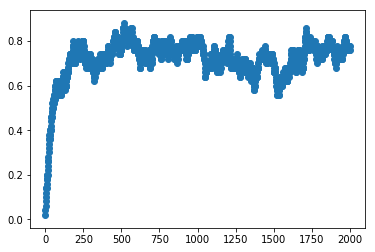

In [44]:
plt.scatter(x,y)
plt.show()

In [46]:
# question: what do we expect?

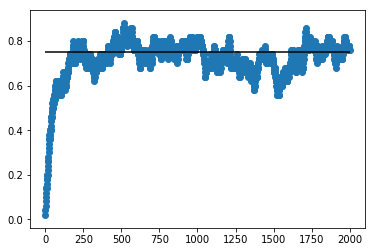

In [45]:
plt.scatter(x,y)
plt.hlines(xmin = 0, xmax = TimeSteps, y = 0.75)
plt.show()

In [ ]:
# homoserine kinase gene evolution (thrB)

In [52]:
thrB_ecoli = 'ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCGGGTTTGATGTGCTCGGGGCG\
GCGGTGACACCTGTTGATGGTGCATTGCTCGGAGATGTAGTCACGGTTGAGGCGGCAGAGACATTCAGTCTCAACAACCT\
CGGACGCTTTGCCGATAAGCTGCCGTCAGAACCACGGGAAAATATCGTTTATCAGTGCTGGGAG\
CGTTTTTGCCAGGAACTGGGTAAGCAAATTCCAGTGGCGATGACCCTGGAAAAGAATATGCCGATCGGTT\
CGGGCTTAGGCTCCAGTGCCTGTTCGGTGGTCGCGGCGCTGATGGCGATGAATGAACACTGCGGCAAGCC\
GCTTAATGACACTCGTTTGCTGGCTTTGATGGGCGAGCTGGAAGGCCGTATCTCCGGCAGCATTCATTAC\
GACAACGTGGCACCGTGTTTTCTCGGTGGTATGCAGTTGATGATCGAAGAAAACGACATCATCAGCCAGC\
AAGTGCCAGGGTTTGATGAGTGGCTGTGGGTGCTGGCGTATCCGGGGATTAAAGTCTCGACGGCAGAAGC\
CAGGGCTATTTTACCGGCGCAGTATCGCCGCCAGGATTGCATTGCGCACGGGCGACATCTGGCAGGCTTC\
ATTCACGCCTGCTATTCCCGTCAGCCTGAGCTTGCCGCGAAGCTGATGAAAGATGTTATCGCTGAACCCT\
ACCGTGAACGGTTACTGCCAGGCTTCCGGCAGGCGCGGCAGGCGGTCGCGGAAATCGGCGCGGTAGCGAG\
CGGTATCTCCGGCTCCGGCCCGACCTTGTTCGCTCTGTGTGACAAGCCGGAAACCGCCCAGCGCGTTGCC\
GACTGGTTGGGTAAGAACTACCTGCAAAATCAGGAAGGTTTTGTTCATATTTGCCGGCTGGATACGGCGG\
GCGCACGAGTACTGGAAAACTAA'

In [ ]:
# option-to-see-plus-select lines with mouse
# use command

In [53]:
thrB_dickeya = 'ATGGTGAAAATTTATGCCCCGGCATCCATTGGGAATGTGAGCGTCGGTTTTGATGTGCTGGGGGCGGCGG\
TCTCGCCGGTCGATGGGACACTGCTTGGCGACTGCGTTTCGGTGGAAGCGGCGGAGCTGTTTAGTCTGCA\
TAACGAAGGCCGTTTTGTCAGCAAGCTGCCGGACGATCCCAAACAGAATATCGTTTACCAATGCTGGGAG\
CGTTTCTGTCAGGAAATCGGTAAAACGATACCGGTGTCCATCAAGCTGGAAAAGAATATGCCTATCGGCT\
CTGGCCTGGGTTCCAGCGCCTGTTCGGTGGTGGCGGGGTTGATGGCGATGAATGAATACTGCGGCAAACC\
GCTGGATGACACTCGTCTGCTGACTTTGATGGGCGAGCTGGAAGGCCGTATTTCCGGCAGCGTGCATTAT\
GACAATGTCGCCCCCTGCTTTCTGGGCGGGATCCAGTTGATGGTGGAGGAACTGGGGATTATCAGCCAGT\
CCGTGCCAGGTTTTGACAACTGGTTGTGGGTGATGGCGTACCCAGGCATCAAGGTTTCGACGGCCGAAGC\
GCGGGCGATTTTGCCGGCGCAGTATCGTCGCCAGGATTGCATCAGCCACGGCCGTTATCTGGCCGGTTTC\
ATCCACGCTTGTCACACCGGGCAAGCGGAATTGGCCGCCAGGCTGATGAAGGATGTGATCGCTGAACCCT\
ACCGTACTCGTTTGTTGCCAGGTTTTGCCGAGTCGCGCCGCGCCGCCGAGGAACTGGGCGCACTGGCGTG\
CGGCATTTCCGGTTCCGGGCCGACGCTATTTTCCGTGTGCGACAACATGGGGGCGGCGGAGCGCGTCGCC\
GACTGGCTGCGGGCGCACTACCTGCAGAATAATGAAGGTTTTGTTCATATTTGCCGTCTGGATACGACAG\
GCGCGCGA'

In [54]:
count_differences(thrB_ecoli, thrB_dickeya)

lengths are different 933 918


In [ ]:
#this is due to indels - use "muscle"
>NC_000913.3:2801-3733 Escherichia coli str. K-12 substr. MG1655, complete genome
ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCGGGTTTGATGTGCTC
GGGGCGGCGGTGACACCTGTTGATGGTGCATTGCTCGGAGATGTAGTCACGGTTGAGGCG
GCAGAGACATTCAGTCTCAACAACCTCGGACGCTTTGCCGATAAGCTGCCGTCAGAACCA
CGGGAAAATATCGTTTATCAGTGCTGGGAGCGTTTTTGCCAGGAACTGGGTAAGCAAATT
CCAGTGGCGATGACCCTGGAAAAGAATATGCCGATCGGTTCGGGCTTAGGCTCCAGTGCC
TGTTCGGTGGTCGCGGCGCTGATGGCGATGAATGAACACTGCGGCAAGCCGCTTAATGAC
ACTCGTTTGCTGGCTTTGATGGGCGAGCTGGAAGGCCGTATCTCCGGCAGCATTCATTAC
GACAACGTGGCACCGTGTTTTCTCGGTGGTATGCAGTTGATGATCGAAGAAAACGACATC
ATCAGCCAGCAAGTGCCAGGGTTTGATGAGTGGCTGTGGGTGCTGGCGTATCCGGGGATT
AAAGTCTCGACGGCAGAAGCCAGGGCTATTTTACCGGCGCAGTATCGCCGCCAGGATTGC
ATTGCGCACGGGCGACATCTGGCAGGCTTCATTCACGCCTGCTATTCCCGTCAGCCTGAG
CTTGCCGCGAAGCTGATGAAAGATGTTATCGCTGAACCCTACCGTGAACGGTTACTGCCA
GGCTTCCGGCAGGCGCGGCAGGCGGTCGCGGAAATCGGCGCGGTAGCGAGCGGTATCTCC
GGCTCCGGCCCGACCTTGTTCGCTCTGTGTGACAAGCCGGAAACCGCCCAGCGCGTTGCC
GACTGGTTGGGTAAGAACTACCTGCAAAATCAGGAAGGTTTTGTTCATATTTGCCGGCTG
GATACGGCGGGCGCACGAGTACTGGAAAACTAA
>CP001654.1:644059-644976 Dickeya paradisiaca Ech703 chromosome, complete genome
ATGGTGAAAATTTATGCCCCGGCATCCATTGGGAATGTGAGCGTCGGTTTTGATGTGCTG
GGGGCGGCGGTCTCGCCGGTCGATGGGACACTGCTTGGCGACTGCGTTTCGGTGGAAGCG
GCGGAGCTGTTTAGTCTGCATAACGAAGGCCGTTTTGTCAGCAAGCTGCCGGACGATCCC
AAACAGAATATCGTTTACCAATGCTGGGAGCGTTTCTGTCAGGAAATCGGTAAAACGATA
CCGGTGTCCATCAAGCTGGAAAAGAATATGCCTATCGGCTCTGGCCTGGGTTCCAGCGCC
TGTTCGGTGGTGGCGGGGTTGATGGCGATGAATGAATACTGCGGCAAACCGCTGGATGAC
ACTCGTCTGCTGACTTTGATGGGCGAGCTGGAAGGCCGTATTTCCGGCAGCGTGCATTAT
GACAATGTCGCCCCCTGCTTTCTGGGCGGGATCCAGTTGATGGTGGAGGAACTGGGGATT
ATCAGCCAGTCCGTGCCAGGTTTTGACAACTGGTTGTGGGTGATGGCGTACCCAGGCATC
AAGGTTTCGACGGCCGAAGCGCGGGCGATTTTGCCGGCGCAGTATCGTCGCCAGGATTGC
ATCAGCCACGGCCGTTATCTGGCCGGTTTCATCCACGCTTGTCACACCGGGCAAGCGGAA
TTGGCCGCCAGGCTGATGAAGGATGTGATCGCTGAACCCTACCGTACTCGTTTGTTGCCA
GGTTTTGCCGAGTCGCGCCGCGCCGCCGAGGAACTGGGCGCACTGGCGTGCGGCATTTCC
GGTTCCGGGCCGACGCTATTTTCCGTGTGCGACAACATGGGGGCGGCGGAGCGCGTCGCC
GACTGGCTGCGGGCGCACTACCTGCAGAATAATGAAGGTTTTGTTCATATTTGCCGTCTG
GATACGACAGGCGCGCGA---------------